데이터 시각화 양식

양식의 순서는 지키되 참고만 하고 자유롭게 더하거나 빼서 분석하세요.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

In [43]:
# 파일 불러오기
df = pd.read_csv('2022-06-29_last_bab.csv')
# dtype -> datetime으로 바꾸기 
df['completed_at'] = pd.to_datetime(df['completed_at'])

In [44]:
# 첫번째 열 드롭
df.drop(columns='Unnamed: 0', inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

# 매출 분석

In [47]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND'], dtype=object)

In [48]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

총매출 구하기 : type = payment & refund / state = completed

In [105]:
# payment & completed
pay_com = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]
pay_com

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,month_year,quarter
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,CARD,영상 편집,2020-12-02 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,CARD,부동산/금융,2020-11-27 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101094,1364969,669238,204286,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,...,CARD,디자인툴,2021-04-23 00:00:00,2021,9,25,13,Saturday,2021-09,2021Q3
101095,1364976,384003,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,...,CARD,영상 편집,2020-12-02 00:00:00,2021,9,25,13,Saturday,2021-09,2021Q3
101096,1364991,670891,203935,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,...,CARD,백엔드 개발,2021-05-31 00:00:00,2021,9,25,14,Saturday,2021-09,2021Q3
101099,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,...,VBANK,영상 편집,2021-06-15 00:00:00,2021,9,25,14,Saturday,2021-09,2021Q3


In [106]:
# refund & completed
re_com = df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]
re_com

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,month_year,quarter
645,972377,444760,204122,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,...,VBANK,마케팅,2018-11-11 00:00:00,2021,3,29,9,Monday,2021-03,2021Q1
646,972381,472666,203178,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,...,CARD,영상 편집,2020-12-02 00:00:00,2021,3,29,9,Monday,2021-03,2021Q1
660,972409,447177,203989,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,...,CARD,일러스트,2021-02-19 00:00:00,2021,3,29,9,Monday,2021-03,2021Q1
666,972422,373915,204264,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,...,VBANK,데이터사이언스,2021-03-08 00:00:00,2021,3,29,9,Monday,2021-03,2021Q1
669,972436,456086,300000,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,...,CARD,프로그래밍,2018-11-11 00:00:00,2021,3,29,9,Monday,2021-03,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,...,CARD,백엔드 개발,2021-07-15 00:00:00,2021,9,24,14,Friday,2021-09,2021Q3
100870,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,...,CARD,마케팅,2018-11-11 00:00:00,2021,9,24,14,Friday,2021-09,2021Q3
100895,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,...,CARD,영상 편집,2021-08-17 00:00:00,2021,9,24,16,Friday,2021-09,2021Q3
100933,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,...,POINT,엑셀/VBA,2021-08-17 00:00:00,2021,9,24,17,Friday,2021-09,2021Q3


In [198]:
com_Pay_Re = pd.concat([pay_com,re_com])
com_Pay_Re

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,month_year,quarter
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,CARD,영상 편집,2020-12-02 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,CARD,부동산/금융,2020-11-27 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,...,CARD,백엔드 개발,2021-07-15 00:00:00,2021,9,24,14,Friday,2021-09,2021Q3
100870,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,...,CARD,마케팅,2018-11-11 00:00:00,2021,9,24,14,Friday,2021-09,2021Q3
100895,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,...,CARD,영상 편집,2021-08-17 00:00:00,2021,9,24,16,Friday,2021-09,2021Q3
100933,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,...,POINT,엑셀/VBA,2021-08-17 00:00:00,2021,9,24,17,Friday,2021-09,2021Q3


In [108]:
#총매출
com_Pay_Re['transaction_amount'].sum()

5972719534

총 매출 = 5,972,719,534원

## 시간대, 요일, 일, 주, 월, 분기, 총 매출(반기), 6개월간 추이

In [101]:
#year(연도) 컬럼 추가
df['Year'] = df['completed_at'].dt.year 

In [102]:
#month(월) 컬럼 추가
df['Month'] = df['completed_at'].dt.month

In [103]:
#day(일) 컬럼 추가
df['Day'] = df['completed_at'].dt.day

In [104]:
#hour(시간)컬럼추가
df['Hour'] = df['completed_at'].dt.hour

In [57]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour
0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,...,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00,2021,3,28,15
1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,...,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00,2021,3,28,15
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15
3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,0,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101097,1364995,640697,205365,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,...,20000,116000,INICIS,TRANS,영상 편집,2021-06-15 00:00:00,2021,9,25,14
101098,1364998,670896,204159,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,...,0,189000,INICIS,CARD,부동산 개발,2021-02-10 00:00:00,2021,9,25,14
101099,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,...,20000,116000,INICIS,VBANK,영상 편집,2021-06-15 00:00:00,2021,9,25,14
101100,1365005,670896,204159,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,...,0,189000,INICIS,CARD,부동산 개발,2021-02-10 00:00:00,2021,9,25,14


### 시간대별 매출 그래프

#### 시간대별 count 그래프

<AxesSubplot:xlabel='Hour', ylabel='count'>

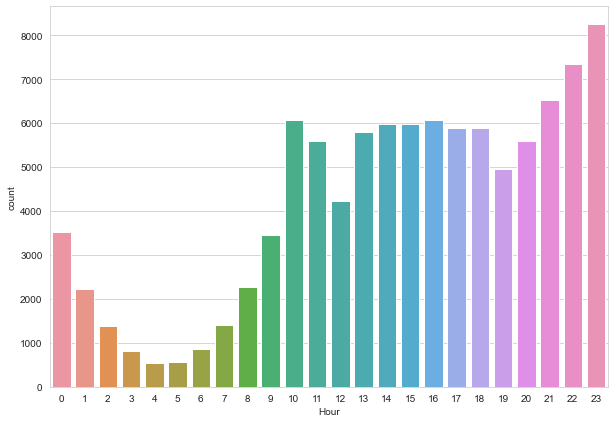

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Hour")

In [59]:
sum_hour = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
sum_hour

,transaction_amount
completed_at,
0,233549455
1,136075550
2,95817755
3,52194135
4,33338600
5,36766265
6,55248680
7,94951875
8,155896900


<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

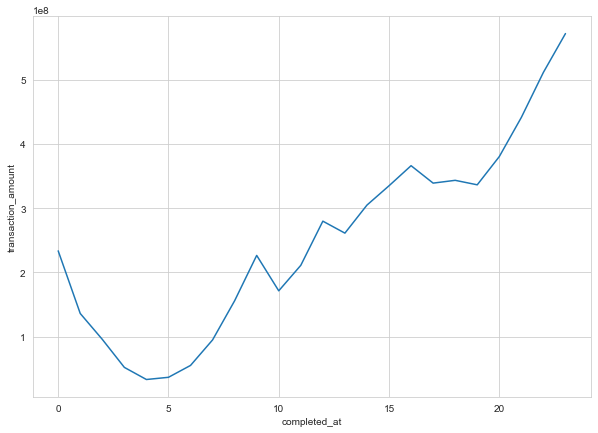

In [60]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.lineplot(data=sum_hour, x="completed_at", y ='transaction_amount')

### 요일별 매출 그래프

In [61]:
df['Weekday'] = df['completed_at'].dt.day_name()

In [62]:
sum_week = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.day_name()).sum()[['transaction_amount']]
sum_week.sort_index(ascending=True)

,transaction_amount
completed_at,
Friday,819967968
Monday,794476420
Saturday,737461545
Sunday,1149664615
Thursday,708513498
Tuesday,859965425
Wednesday,902670063


인덱스 정렬 다시...

<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

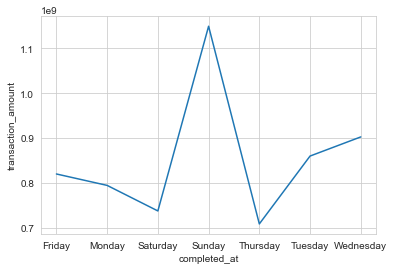

In [63]:
sns.lineplot(data=sum_week, x='completed_at', y='transaction_amount')

In [64]:
# plt.figure(figsize=(10,7))
# sns.countplot(data=df, x="Weekday")

### 일별 매출 그래프

In [65]:
sum_day = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.day).sum()[['transaction_amount']]
sum_day.sort_index(ascending=True)

,transaction_amount
completed_at,
1,120656529
2,136319725
3,132405593
4,178228365
5,141387104
6,165539322
7,154945359
8,165210479
9,177890909


<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

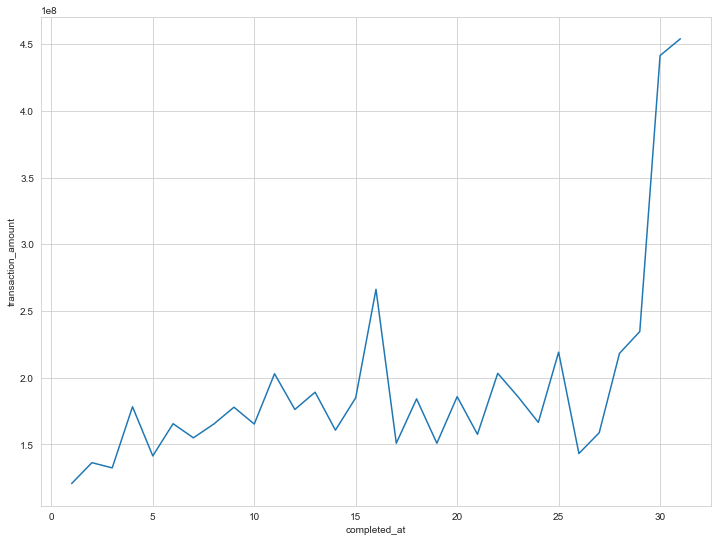

In [66]:
plt.figure(figsize=(12,9))
sns.lineplot(data=sum_day, x='completed_at', y='transaction_amount')

월말에 매출이 올라가는 걸로 봐서 월말에 끝나는 이벤트가 많을듯?!

In [67]:
# 월별 날짜로 매출 구하기
# sum_mday = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.day).sum()[['transaction_amount']]
# sum_mday.sort_index(ascending=True)

In [68]:
# plt.figure(figsize=(15,9))
# sns.lineplot(data=df, x="m-d")
# sns.countplot(data=df, x="Day")

### 주별 매출 그래프

In [69]:
# df['day_of_week'] = df['completed_at'].dt.week

In [70]:
#주별 매출 (sum) 구하기
sum_sweek = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.week).sum()[['transaction_amount']]
sum_sweek.sort_index(ascending=True)

/var/folders/mb/9mp8sm994p9c0708gn3gmss40000gn/T/ipykernel_26114/4071369556.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sum_sweek = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.week).sum()[['transaction_amount']]


,transaction_amount
completed_at,
12,36101770
13,280902095
14,174836172
15,180461592
16,172120121
17,283422726
18,178097029
19,209188129
20,184205414


In [71]:
plt.figure(figsize=(10,7))
sns.countplot(data=sum_sweek, x="completed_at", y)
# sns.countplot(data=df, x="day_of_week")

SyntaxError: positional argument follows keyword argument (3974353985.py, line 2)

### 월별 매출 그래프

In [72]:
#make year&month cols 
df['month_year'] = pd.to_datetime(df['completed_at']).dt.to_period('M')

In [73]:
# df

<AxesSubplot:xlabel='month_year', ylabel='count'>

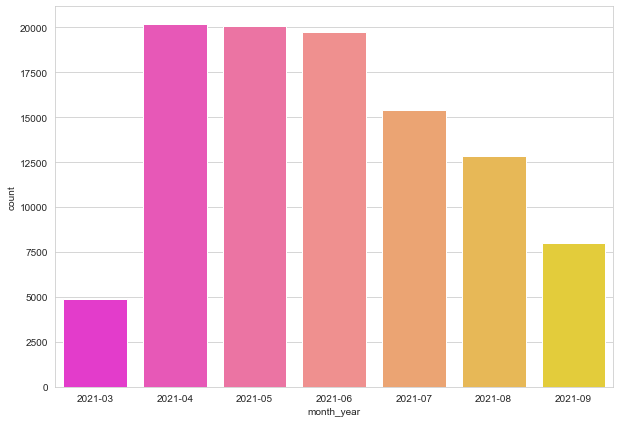

In [89]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
plt.xticks(rotation = 0)
sns.countplot(data=df, x='month_year', palette='spring')

### 분기별 매출 그래프

In [90]:
df['quarter'] = df['completed_at'].dt.to_period('Q')

In [91]:
sum_quart = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.to_period('Q')).sum()[['transaction_amount']]
sum_quart.sort_index(ascending=True)

,transaction_amount
completed_at,
2021Q1,192480994
2021Q2,2747800161
2021Q3,3032438379


In [92]:
# plt.figure(figsize=(10,7))
# sns.lineplot(data=sum_quart, x="completed_at")

### 6개월(반기) 총매출 그래프

# 강의 분석

## 전체 강의 수

In [93]:
len(df['course_title'].unique())

610

## 전체 카테고리 수

In [94]:
len(df['category_title'].unique())

14

## 가장많은(적은) 매출을 올린 강의 및 탑 10강의 매출추이

### 매출 상위 1~10위 까지의  강의  목록 

In [95]:
# course_title 확인하기
# course_title =  df['course_title'].unique()
# course_title

In [109]:
#강의 리스트에서 가장 많은 매출 순으로 정렬 (10위까지)
sum_cour_list = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['course_title'])
x = sum_cour_list.sum()
course_title_desc = x.sort_values(ascending=False)
co_10 = course_title_desc.head(10)
co_10

course_title
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법           151049741
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                      141248845
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략    129821723
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                      116614335
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터           108576441
나의 칼퇴치트키 엑셀유치원                                    88201167
초격차 패키지 : 한번에 끝내는 디자인 툴                           87700764
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                   84763815
올인원 패키지 : 완전정복 시각디자인 기초                           82131657
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                       80602968
Name: transaction_amount, dtype: int64

In [111]:
#for문으로 만들다가 어려워서(방법찾다가 시간 많이 걸림..)... 그냥 노가다..
a1 = com_Pay_Re[(com_Pay_Re['course_title'] == 'The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법') & (com_Pay_Re['Month'])]
a2 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한 번에 끝내는 프론트엔드 개발') & (com_Pay_Re['Month'])]
a3 = com_Pay_Re[(com_Pay_Re['course_title'] == '올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략') & (com_Pay_Re['Month'])]
a4 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집') & (com_Pay_Re['Month'])]
a5 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터') & (com_Pay_Re['Month'])]
a6 = com_Pay_Re[(com_Pay_Re['course_title'] == '나의 칼퇴치트키 엑셀유치원') & (com_Pay_Re['Month'])]
a7 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한번에 끝내는 디자인 툴') & (com_Pay_Re['Month'])]
a8 = com_Pay_Re[(com_Pay_Re['course_title'] == '올인원 패키지 : star741의 캐주얼 일러스트 드로잉') & (com_Pay_Re['Month'])]
a9 = com_Pay_Re[(com_Pay_Re['course_title'] == '올인원 패키지 : 완전정복 시각디자인 기초') & (com_Pay_Re['Month'])]
a10 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한번에 끝내는 UX/UI 디자인') & (com_Pay_Re['Month'])]

In [112]:
top10 = pd.concat([a1, a2, a3, a4, a5, a6,a7,a8,a9,a10])
top10

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,month_year,quarter
64887,1184847,579669,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 00:44:11,149000,...,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,0,Thursday,2021-07,2021Q3
64896,1184895,579641,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 01:39:14,149000,...,POINT,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,1,Thursday,2021-07,2021Q3
64897,1184899,579743,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 01:45:48,149000,...,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,1,Thursday,2021-07,2021Q3
64903,1184912,579749,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 01:57:34,149000,...,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,1,Thursday,2021-07,2021Q3
64914,1184982,573472,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 04:48:54,149000,...,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,4,Thursday,2021-07,2021Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94735,1330996,634463,203523,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-09-06 14:10:04,-141000,...,CARD,UX/UI,2020-12-18 00:00:00,2021,9,6,14,Monday,2021-09,2021Q3
95349,1333631,652568,203523,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-09-07 11:00:12,-156000,...,CARD,UX/UI,2020-12-18 00:00:00,2021,9,7,11,Tuesday,2021-09,2021Q3
96609,1339069,658585,203523,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-09-10 10:35:09,-156000,...,POINT,UX/UI,2020-12-18 00:00:00,2021,9,10,10,Friday,2021-09,2021Q3
98876,1349489,662544,203523,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-09-16 13:26:03,-156000,...,CARD,UX/UI,2020-12-18 00:00:00,2021,9,16,13,Thursday,2021-09,2021Q3


In [ ]:
dic_list = []
for i in co_10:
    dic_list.append(df['course_title'] == i)

### 매출 상위 1~10위 강의 매출 추이 그래프(6개월간)

1강의 당 월간 매출 구해서 한 그래프에 10개의 그래프 보여주면 될듯?!!!

사용가능 그래프 : displot, lineplot, pointplot </br>
x축 : Month / y축 : transaction / hue: 강의명 

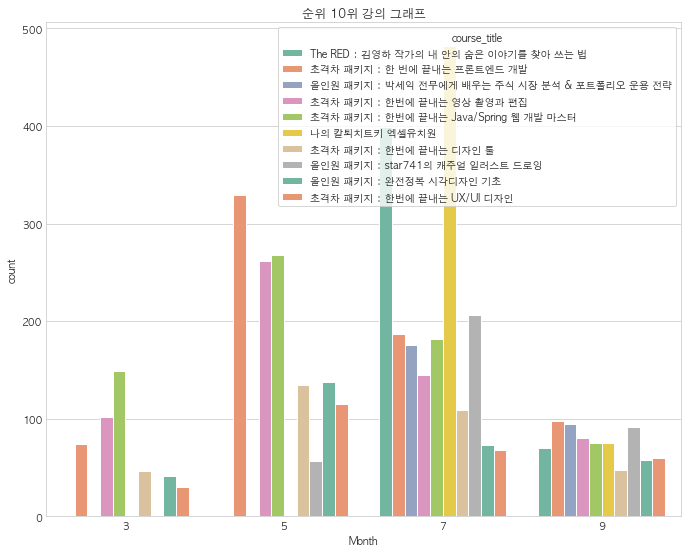

In [167]:
plt.figure(figsize=(9, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = top10, x='Month', hue='course_title', palette='Set2')
plt.title('순위 10위 강의 그래프')
plt.show()

### 매출 하위 1~10위 강의목록

In [160]:
#강의 리스트에서 가장 많은 매출 (오름차)순으로 정렬 (10위까지)
sum_cour_list = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['course_title'])
x = sum_cour_list.sum()
course_title_desc = x.sort_values(ascending=True)
co_10 = course_title_desc.head(10)
co_10

course_title
프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스)                            -1400000
프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)   -1399000
모션그래픽 포트폴리오 온라인 완주반 1기                                      -1144000
코딩+알고리즘 온라인 완주반 5기                                           -810000
디지털 마케팅 온라인 완주반 3기                                           -575000
매주)브런치로 책 출판 온라인 완주반                                         -520000
매주)컴퓨터 공학 전공자 따라잡기 온라인 완주반                                   -380000
브런치로 책 출판 온라인 완주반 3기                                         -360000
건축/공간 디자인 실무 완성 온라인 완주반 1기                                   -334800
프로모션 :개강 전 필수 마스터 코딩 한끝세트 (3월 프리패스)                          -299000
Name: transaction_amount, dtype: int64

### 매출 하위 1~10위 강의 매출 추이 그래프(6개월간)

In [161]:
b1 = com_Pay_Re[(com_Pay_Re['course_title'] == '프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스)') & (com_Pay_Re['Month'])]
b2 = com_Pay_Re[(com_Pay_Re['course_title'] == '프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)') & (com_Pay_Re['Month'])]
b3 = com_Pay_Re[(com_Pay_Re['course_title'] == '모션그래픽 포트폴리오 온라인 완주반 1기') & (com_Pay_Re['Month'])]
b4 = com_Pay_Re[(com_Pay_Re['course_title'] == '코딩+알고리즘 온라인 완주반 5기') & (com_Pay_Re['Month'])]
b5 = com_Pay_Re[(com_Pay_Re['course_title'] == '디지털 마케팅 온라인 완주반 3기') & (com_Pay_Re['Month'])]
b6 = com_Pay_Re[(com_Pay_Re['course_title'] == '매주)브런치로 책 출판 온라인 완주반') & (com_Pay_Re['Month'])]
b7 = com_Pay_Re[(com_Pay_Re['course_title'] == '매주)컴퓨터 공학 전공자 따라잡기 온라인 완주반') & (com_Pay_Re['Month'])]
b8 = com_Pay_Re[(com_Pay_Re['course_title'] == '브런치로 책 출판 온라인 완주반 3기') & (com_Pay_Re['Month'])]
b9 = com_Pay_Re[(com_Pay_Re['course_title'] == '건축/공간 디자인 실무 완성 온라인 완주반 1기') & (com_Pay_Re['Month'])]
b10 = com_Pay_Re[(com_Pay_Re['course_title'] == '프로모션 :개강 전 필수 마스터 코딩 한끝세트 (3월 프리패스)') & (com_Pay_Re['Month'])]

In [ ]:
pd.concat

In [162]:
tail10 = pd.concat([b1,b2,b3,b4,b5,b6,b7,b8,b9,b10])
com1 = tail10[['course_title','transaction_amount','Month']]
com1_sum = com1.set_index('Month')
com1_sum.sort_index(ascending=True)
bi = com1_sum.groupby('Month')
bi['course_title']

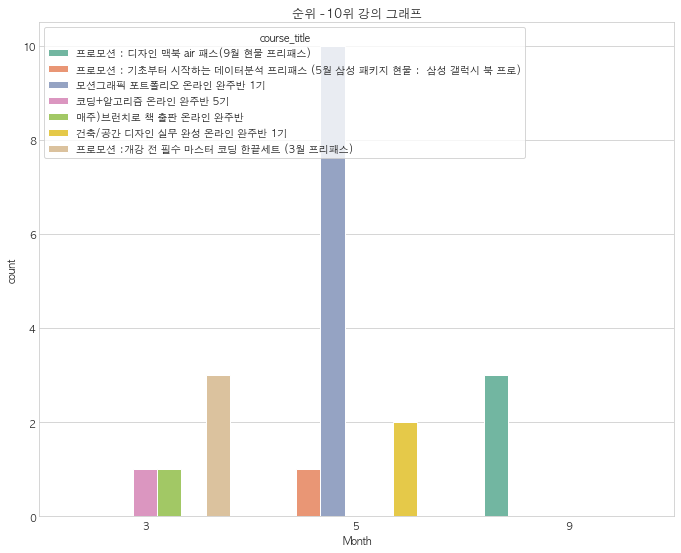

In [166]:
plt.figure(figsize=(9, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = tail10, x='Month', hue='course_title', palette='Set2')
plt.title('순위 -10위 강의 그래프')
plt.show()

## 가장많은(적은) 매출을 올린 카테고리 탑 10카테고리 매출추이

### 매출 상위 1~10위 까지의  카테고리  목록

In [229]:
# 데이터 사이언스 띄어쓰기 0,x 합쳐주기
# com_Pay_Re.replace('데이터 사이언스','데이터사이언스', inplace=True)

In [228]:
# com_Pay_Re[com_Pay_Re['category_title'] == '데이터사이언스']

In [230]:
#카테고리에서 가장 많은 매출 순으로 정렬 (10위까지)
cate_list = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['category_title'])
cl = cate_list.sum()
c1_1= cl.sort_values(ascending=False)
cate_d = c1_1.head(10)
cate_d

category_title
프로그래밍      1650488541
데이터사이언스     950073852
디자인         663196168
마케팅         587623324
업무 생산성      572358665
영상/3D       544706205
부동산/금융      471074334
투자/재테크      277706420
크리에이티브      240873160
비즈니스          5029865
Name: transaction_amount, dtype: int64

In [231]:
c1 = com_Pay_Re[(com_Pay_Re['category_title'] == '프로그래밍') & (com_Pay_Re['Month'])]
c2 = com_Pay_Re[(com_Pay_Re['category_title'] == '데이터사이언스') & (com_Pay_Re['Month'])]
c3 = com_Pay_Re[(com_Pay_Re['category_title'] == '디자인') & (com_Pay_Re['Month'])]
c4 = com_Pay_Re[(com_Pay_Re['category_title'] == '마케팅') & (com_Pay_Re['Month'])]
c5 = com_Pay_Re[(com_Pay_Re['category_title'] == '업무 생산성') & (com_Pay_Re['Month'])]
c6 = com_Pay_Re[(com_Pay_Re['category_title'] == '영상/3D') & (com_Pay_Re['Month'])]
c7 = com_Pay_Re[(com_Pay_Re['category_title'] == '부동산/금융') & (com_Pay_Re['Month'])]
c8 = com_Pay_Re[(com_Pay_Re['category_title'] == '투자/재테크') & (com_Pay_Re['Month'])]
c9 = com_Pay_Re[(com_Pay_Re['category_title'] == '크리에이티브') & (com_Pay_Re['Month'])]
c10 = com_Pay_Re[(com_Pay_Re['category_title'] == '비즈니스') & (com_Pay_Re['Month'])]

In [232]:
cate10 = pd.concat([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10])
cate10

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,month_year,quarter
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
22,970695,455311,203146,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 15:43:59,149500,...,CARD,DevOps,2021-02-08 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
40,970730,445723,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,...,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021,3,28,16,Sunday,2021-03,2021Q1
57,970789,478098,300000,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 16:52:29,299000,...,CARD,프로그래밍,2018-11-11 00:00:00,2021,3,28,16,Sunday,2021-03,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94024,1328425,31183,300000,PAYMENT,COMPLETED,프로모션 : MBA부터 HR까지 직장인 스킬 벼락치기 패키지 (9월 프리패스),비즈니스,올인원,2021-09-05 01:29:50,330000,...,CARD,비즈니스,2018-11-11 00:00:00,2021,9,5,1,Sunday,2021-09,2021Q3
94040,1328486,194316,300000,PAYMENT,COMPLETED,프로모션 : 워라밸을 완성하는 직장인 필수스킬 벼락치기 패키지 (9월 프리패스),비즈니스,올인원,2021-09-05 03:58:47,330000,...,CARD,비즈니스,2018-11-11 00:00:00,2021,9,5,3,Sunday,2021-09,2021Q3
94081,1328685,653629,300000,PAYMENT,COMPLETED,프로모션 : MBA부터 HR까지 직장인 스킬 벼락치기 패키지 (9월 프리패스),비즈니스,올인원,2021-09-05 12:28:42,330000,...,CARD,비즈니스,2018-11-11 00:00:00,2021,9,5,12,Sunday,2021-09,2021Q3
94553,1330401,408034,300000,REFUND,COMPLETED,프로모션 : MBA부터 HR까지 직장인 스킬 벼락치기 패키지 (9월 프리패스),비즈니스,올인원,2021-09-06 11:24:48,-330000,...,CARD,비즈니스,2018-11-11 00:00:00,2021,9,6,11,Monday,2021-09,2021Q3


### 매출 상위 1~10위 카테고리 매출 추이 그래프(6개월간)

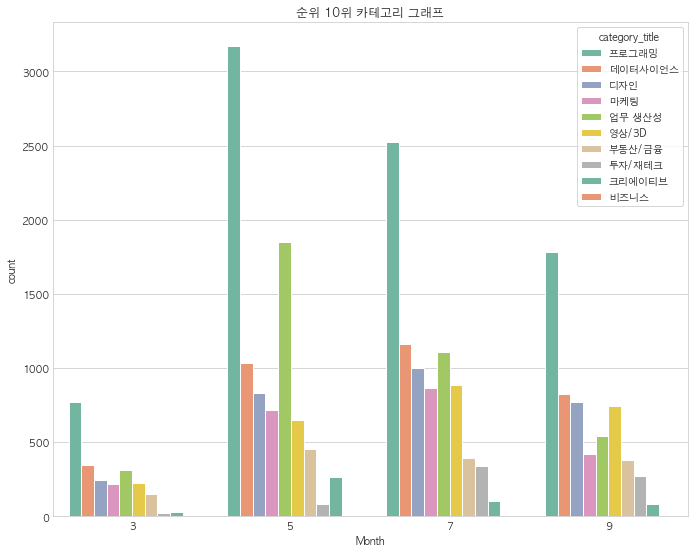

In [233]:
plt.figure(figsize=(9, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = cate10, x='Month', hue='category_title', palette='Set2')
plt.title('순위 10위 카테고리 그래프')
plt.show()

### 매출 하위 1~10위 카테고리목록

In [234]:
#카테고리에서 가장 많은 매출 순으로 정렬 (10위까지)
cate_list2 = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['category_title'])
cl2 = cate_list2.sum()
c1_12= cl2.sort_values(ascending=True)
cate_d2 = c1_12.head(10)
cate_d2

category_title
파이낸스        4620000
지식콘텐츠       4969000
비즈니스        5029865
크리에이티브    240873160
투자/재테크    277706420
부동산/금융    471074334
영상/3D     544706205
업무 생산성    572358665
마케팅       587623324
디자인       663196168
Name: transaction_amount, dtype: int64

### 매출 하위 1~10위 카테고리 매출 추이 그래프(6개월간)

In [241]:
d1 = com_Pay_Re[(com_Pay_Re['category_title'] == '파이낸스') & (com_Pay_Re['Month'])]
d2 = com_Pay_Re[(com_Pay_Re['category_title'] == '지식콘텐츠') & (com_Pay_Re['Month'])]
d3 = com_Pay_Re[(com_Pay_Re['category_title'] == '비즈니스') & (com_Pay_Re['Month'])]
d4 = com_Pay_Re[(com_Pay_Re['category_title'] == '크리에이티브') & (com_Pay_Re['Month'])]
d5 = com_Pay_Re[(com_Pay_Re['category_title'] == '투자/재테크') & (com_Pay_Re['Month'])]
d6 = com_Pay_Re[(com_Pay_Re['category_title'] == '부동산/금융') & (com_Pay_Re['Month'])]
d7 = com_Pay_Re[(com_Pay_Re['category_title'] == '영상/3D') & (com_Pay_Re['Month'])]
d8 = com_Pay_Re[(com_Pay_Re['category_title'] == '업무 생산성') & (com_Pay_Re['Month'])]
d9 = com_Pay_Re[(com_Pay_Re['category_title'] == '마케팅') & (com_Pay_Re['Month'])]
d10 = com_Pay_Re[(com_Pay_Re['category_title'] == '디자인') & (com_Pay_Re['Month'])]

In [242]:
cate_tail10 = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10])
cate_tail10

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,month_year,quarter
93215,1323596,641485,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-01 14:04:44,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,1,14,Wednesday,2021-09,2021Q3
93380,1324639,121917,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-02 08:12:13,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,2,8,Thursday,2021-09,2021Q3
93712,1326538,546634,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-03 13:00:27,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,3,13,Friday,2021-09,2021Q3
93936,1327974,654322,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-04 16:04:50,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,4,16,Saturday,2021-09,2021Q3
94034,1328457,45825,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-05 02:52:32,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,5,2,Sunday,2021-09,2021Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100540,1360783,666751,204013,REFUND,COMPLETED,올인원 패키지 : 완전정복 시각디자인 기초,디자인,올인원,2021-09-23 13:46:36,-164000,...,CARD,시각디자인,2021-03-16 00:00:00,2021,9,23,13,Thursday,2021-09,2021Q3
100550,1360833,667500,204871,REFUND,COMPLETED,올인원 패키지 : star741의 캐주얼 일러스트 드로잉,디자인,올인원,2021-09-23 14:00:58,-169000,...,CARD,일러스트,2021-05-25 00:00:00,2021,9,23,14,Thursday,2021-09,2021Q3
100574,1360973,55069,300000,REFUND,COMPLETED,프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스),디자인,올인원,2021-09-23 14:52:48,-1400000,...,CARD,디자인,2018-11-11 00:00:00,2021,9,23,14,Thursday,2021-09,2021Q3
100788,1363264,642002,300000,REFUND,COMPLETED,프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스),디자인,올인원,2021-09-24 10:57:42,-1400000,...,CARD,디자인,2018-11-11 00:00:00,2021,9,24,10,Friday,2021-09,2021Q3


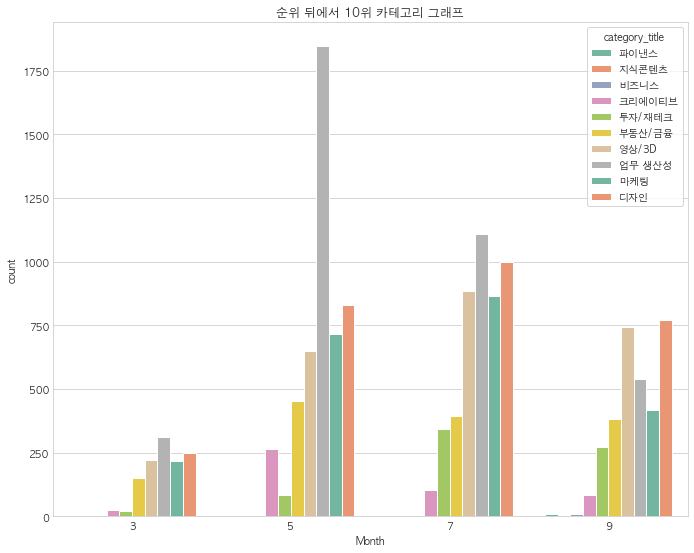

In [245]:
plt.figure(figsize=(9, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = cate_tail10, x='Month', hue='category_title', palette='Set2')
plt.title('순위 뒤에서 10위 카테고리 그래프')
plt.show()

# 수강 신청 행동 패턴 분석

## cancelled 가장 많은 강좌(구매가 많은게 환불이 많은가? 주의)

In [459]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND'], dtype=object)

In [460]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

타입은 order인데 state는 취소인 강좌 찾기

In [463]:
cc = df[(df['type'] == 'ORDER') & (df['state'] == 'CANCELLED')]

### 취소가 많은  1~20위 까지의  강의  목록(cancelled)

In [470]:
c1 = cc.groupby('course_title')['state']
c_sum = c1.count()
c_desc = c_sum.sort_values(ascending=False)
c_desc.head(20)

course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                           1331
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                                            998
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                                 942
초격차 패키지 : 한번에 끝내는 디자인 툴                                                640
입만 열면 인정받는 스피치 10분컷                                                    620
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential     598
초격차 패키지 : 한 번에 끝내는 엑셀 실무                                               594
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin                       573
올인원 패키지 : 완전정복 시각디자인 기초                                                539
초격차 패키지 : 한번에 끝내는 PPT 제작/디자인                                           512
초격차 패키지 : 한번에 끝내는 모션그래픽                                                499
올인원 패키지 : 디지털 마케팅 MAX 2020                                             487
초격차 패키지 : 한 번에 끝내는 데이터 분석 툴                                            485
초격차 패키지 : 한번

### 취소가 가장 적은 1~20위 강의 목록

In [471]:
c1 = cc.groupby('course_title')['state']
c_sum = c1.count()
c_desc = c_sum.sort_values(ascending=True)
c_desc.head(20)

course_title
(test)프로모션 강의 페이지                                            1
[한정판매] 딥러닝 끝장 패키지(~5월)                                       1
[한정판매] 자연어 A-Z 끝장 패키지(~7월)                                   1
데이터분석 프로젝트+자격증 온라인 완주반 2기                                    1
매주)서비스 기획서 완성 온라인 완주반                                        1
스프링 아카데미아 강의 5 - Spring Security 인증 커스텀을 통한 서비스 구축           1
스프링 아카데미아 강의 8 - Spring Security를 통한 MFA 구현                  1
승인받는 이모티콘 만들기 온라인 완주반 1기                                     1
엑셀 온라인 완주반 3기                                                1
프로모션 : 풀스택 마케터를 위한 마케팅 프리패스 (5월 삼성 패키지 현물 :  삼성노트북 플러스2)     1
프로모션 : 풀스택 마케터를 위한 마케팅 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)    1
프로모션 : 딥러닝 A to Z까지 한 번에 마스터하는 iPad 패키지 (7월 현물 프리패스)         1
올인원 패키지 : 1인 쇼핑몰 시작하기 (2020)                                 1
프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프리패스)           1
프로모션 : 데이터 분석 A to Z 평생 PASS (10월)                           1
프로모션 : 데이터 보는 눈을 바꿔 줄 데이터 마케팅 한끝세트 (3월 프리패

### 환불이 많은  1~20위 까지의  강의  목록(refund)

type이 refund이면서 state는 completed인 것

In [474]:
rc = df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]

In [481]:
rc1 = rc.groupby('course_title')['type']
rc_c = rc1.count()
rc_a = rc_c.sort_values(ascending=False)
rcc = rc_a.head(20)
rcc

course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                           121
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                                105
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                                     68
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                                        65
초격차 패키지 : 한번에 끝내는 디자인 툴                                                64
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin                       63
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                                            60
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                                 57
올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리미어프로 베이직                 55
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential     53
초격차 패키지 : 한번에 끝내는 모션그래픽                                                50
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                                            50
초격차 패키지 : 한번에 끝내는 PPT 제작/디자인                                           50
올인원 패키지 : 박세익 전무에게 배우는 주식

### 환불률이 가장 적은 1~20위 강의 목록

In [482]:
rc1 = rc.groupby('course_title')['type']
rc_c = rc1.count()
rc_a = rc_c.sort_values(ascending=True)
rcc = rc_a.head(20)
rcc

course_title
(test)프로모션 강의 페이지                                    1
프로모션 : 온라인 창업 될 때 까지 무제한 패스 (4월 프리패스)                1
올인원 패키지 : 콘텐츠 마케팅                                    1
프로모션 : 영알못도 완성하는 영상편집 무제한 99패스 (5월 프리패스)             1
올인원 패키지 : 파이썬을 활용한 시계열 데이터 분석 A-Z                    1
프로모션 : 영상그래픽 디자인 맥북 pro 패스(9월 현물 프리패스)               1
제품 디자인 포트폴리오 온라인 완주반 2기                              1
프로모션 : 영상 퀄리티를 바꿔 줄 영상 제작 스킬 무제한 99패스 (5월 프리패스)      1
프로모션 : 유튜버 따라잡고 실버버튼 받는 영상 평생 PASS (8월 프리패스)         1
프로모션 : 영상 퀄리티를 높이는 전문가 편집스킬 벼락치기 패키지 (9월 프리패스)       1
프로모션 : 연봉 앞자리가 바뀌는 앱개발 무제한 패스 (4월 프리패스)              1
초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영 v.1 (폐강)    1
프로모션 : 연봉 앞자리가 바뀌는 앱개발 iPad 패키지 (7월 현물 프리패스)         1
프로모션 : 아이패드 200%활용 드로잉 만랩 iPad 패키지 (7월 현물 프리패스)      1
프로모션 : 시장의 흐름을 읽는 투자의 정석 평생 PASS  (8월 프리패스)          1
프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지  (9월 프리패스)         1
프로모션 : 비전공자를 위한 데이터 분석 왕초보 입문 무한패스 (9월 프리패스)         1
프로모션 : 영상 퀄리티를 높이는 전문가 편집스킬 PASS (7월 프리패스)          

### 구매률과 환불률의 상관관계

# PG사 목록

## 기존 PG사 vs 신규 pg사 점유율 현황

In [98]:
df['pg'].unique()

array(['COMM', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

### 기존 PG사 vs 신규 pg사 기간별 점유율 변동 변화추이

기존 : 이니시스 
신규 : 카카오, 네이버, 페이코, 차이..?

In [98]:
pig1 = df.set_index('completed_at').groupby(lambda date: date.month).count()[['pg']]
pig1.sort_index(ascending=True)

,pg
completed_at,
3,4906
4,20163
5,20055
6,19747
7,15380
8,12853
9,7998


In [99]:
pig = df[df['pg'] != 'INICIS']
pigs = pig.groupby('pg')['method']
pigs.count()

pg
CHAI       321
COMM     12243
KAKAO    17138
NAVER     7979
PAYCO     4609
Name: method, dtype: int64

# VIP그룹 분석

## VIP 그룹 정의

In [100]:
com_Pay_Re.describe()['transaction_amount']

count    5.304000e+04
mean     1.126078e+05
std      1.335663e+05
min     -1.800000e+06
25%      7.900000e+04
50%      1.160000e+05
75%      1.550000e+05
max      1.800000e+06
Name: transaction_amount, dtype: float64

vip 그룹 정의 </br>
id를 transaction_amount와 그룹.(id중복제거) </br>
id에서 가장 많은 금액 10%찾아보기

In [559]:
idt = com_Pay_Re.groupby('id')['transaction_amount']
idts = idt.sum()
idtsv = idts.sort_values(ascending=False)
#10%내
idtsv.quantile(0.9)

220000.0

In [560]:
# 위의 결과 맞는지 확인용
# idtsv.describe()

In [556]:
for i in idtsv:
    if i >= 220000:
        print(i)

1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1800000
1400000
1400000
1400000
1400000
1400000
1400000
1400000
1400000
1400000
1400000
1400000
1400000
1400000
1399000
1399000
1399000
1399000
1399000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1290000
1016200
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
990000
890000
890000
890000
890000
890000
890000
890000
890000
890000
890000
890000
890000
890000
880000
880000
880000
880000
880000
880000
880000
880000
880000
880000
880000
880000
880000
740000
740000
740000
740000
740000
740000
740000
740000

301500
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
301000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299900
299700
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000
299000

228500
228500
228500
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
228000
226000
226000
226000
226000
226000
226000
226000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
225000
224700
224700
224700
224700
224700
224700
224700
224000
224000
224000
224000
224000
224000
224000
224000
224000
224000
224000
224000
224000
224000
224000
224000
224000
223300
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223200
223000
223000
222000
222000
222000
222000
222000
222000
222000

## 일반 고객 평균 결제 횟수 vs VIP 고객 평균 결제 횟수

## VIP 그룹 특징

# 쿠폰 사용 분석

## 전체구매건 중 쿠폰사용한 구매비율

## 매출에 대한 쿠폰의 중요도 분석

# 패키지 강의 vs 단품 강의

In [99]:
# df

# 레드는 과연 성공했는가?

In [ ]:
df['']